In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("credit.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,115966.0,-2.163081,1.711095,-0.525640,0.194081,-1.029697,0.136284,-1.357683,1.879366,-0.597058,...,0.452132,0.806195,-0.021418,0.678795,-0.258603,0.712588,-0.713277,-0.182202,6.79,0
1,131891.0,1.804736,-1.271865,-2.956493,-0.353553,0.130945,-1.199074,0.740902,-0.554545,-0.900114,...,-0.000194,-0.045037,-0.290662,0.508793,0.410006,0.982054,-0.186231,-0.048551,258.40,0
2,136997.0,1.963918,-0.131719,-0.888165,0.259542,-0.001108,-0.498022,-0.042393,-0.097297,0.176875,...,-0.394307,-1.202584,0.456352,-0.517482,-0.640613,-0.268896,-0.047348,-0.052698,29.00,0
3,152773.0,-0.190464,1.021640,-0.804140,-0.132867,0.385977,-1.142098,0.469435,0.331246,-0.393996,...,0.410755,1.062838,-0.117616,-0.082971,-0.454951,-0.171760,0.012971,0.041254,14.18,0
4,150005.0,2.008214,-0.280217,-0.465804,0.308430,-0.353631,-0.178018,-0.527558,0.035737,1.260708,...,-0.191681,-0.409743,0.404496,0.559148,-0.401731,-0.644915,0.035181,-0.026480,0.12,0


# Train and Test split

In [3]:
X= df.drop("Class",axis="columns")
Y=df["Class"]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(226971, 30)
(56743, 30)
(226971,)
(56743,)


Always check before built a model is your training dataset is balanced or not.

In [6]:
Y_train.value_counts()

0    226592
1       379
Name: Class, dtype: int64

Look's like our traninig dataset is imbalanced so first we need to balanced that.

***We use OverSampling to solve imbalanced traning data***

In [7]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [8]:
sm = SMOTE(random_state=12)
X_train, Y_train = sm.fit_sample(X_train,Y_train)

In [9]:
print(X_train.shape)
print(Y_train.shape)

(453184, 30)
(453184,)


In [10]:
Y_train.value_counts()

1    226592
0    226592
Name: Class, dtype: int64

**Now our training data is balanced**

In [11]:
X_train.loc[0]

Time      157778.000000
V1            -0.102318
V2             0.355017
V3             1.472947
V4            -0.267198
V5             0.432963
V6             0.864004
V7             0.170404
V8             0.089408
V9             0.068169
V10           -0.138768
V11            0.390472
V12            0.544438
V13            0.521065
V14           -0.399394
V15           -0.007097
V16            0.041325
V17           -0.646902
V18            0.810754
V19            1.173219
V20            0.202743
V21            0.231805
V22            0.980056
V23           -0.252268
V24            0.304315
V25           -0.513289
V26            0.658487
V27           -0.008806
V28           -0.060263
Amount        11.500000
Name: 0, dtype: float64

In [12]:
Y_train.loc[0]

0

In [13]:
#we have to shuffle our data once again.
# for that we have to join our X_train and Y_train together
concatenat = pd.concat([X_train, Y_train], axis=1)

In [14]:
concatenat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,157778.000000,-0.102318,0.355017,1.472947,-0.267198,0.432963,0.864004,0.170404,0.089408,0.068169,...,0.231805,0.980056,-0.252268,0.304315,-0.513289,0.658487,-0.008806,-0.060263,11.500000,0
1,70900.000000,1.233013,-0.520422,0.033394,-0.706597,-0.602408,-0.137798,-0.704692,0.100175,-1.011925,...,0.137506,0.221700,-0.070302,-0.372932,0.295588,-0.256301,0.033671,0.037965,59.900000,0
2,77381.000000,1.207151,-0.214659,0.873963,0.614853,-0.495640,0.637324,-0.726961,0.265679,0.986651,...,-0.122415,-0.107237,-0.038538,-0.731636,0.294839,0.399316,0.033279,0.014372,3.770000,0
3,122802.000000,-0.236398,0.948039,1.184713,4.737655,0.979416,0.185857,0.408900,-0.027505,-1.871850,...,0.255983,0.854751,-0.057445,0.093801,-0.528897,0.459252,0.216245,0.220738,22.720000,0
4,33619.000000,1.163253,-0.014139,1.272299,1.420947,-0.926893,-0.121972,-0.519157,0.093523,0.977292,...,-0.180902,-0.219039,0.020564,0.398989,0.448507,-0.456745,0.075666,0.035279,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453179,62144.419722,-2.222882,2.126074,-3.128421,3.442500,-3.348853,0.193943,-1.683957,1.090650,-2.164823,...,0.598526,0.376840,-0.243781,-0.433650,-0.107804,0.029476,0.522232,-0.073007,383.439813,1
453180,20534.941595,-15.660487,8.643150,-22.668659,11.871206,-8.982762,-2.369684,-16.455173,0.821834,-6.317482,...,-2.351712,1.045480,1.123201,-1.042524,-0.129940,0.655189,2.139298,-1.410086,1.000000,1
453181,168034.589157,-2.444340,-0.472410,-2.772435,1.367274,-0.329228,-0.868994,1.487789,-0.305470,-0.665766,...,0.029802,0.251212,0.127289,0.395556,-0.213896,-0.138659,0.653129,-0.153862,484.839949,1
453182,142739.472988,-0.371175,1.806046,-3.325165,3.566761,2.411063,-2.413755,-4.524892,-1.235140,-1.439346,...,-0.426735,-0.252472,-3.902142,0.332871,-0.973055,-0.372891,0.710206,0.412249,1.650293,1


In [15]:
#now shuffle
data = shuffle(concatenat)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
23056,78450.000000,1.345902,-0.727354,-0.055258,-0.801420,-0.394547,0.396940,-0.655002,0.148893,-0.658044,...,0.080432,0.284864,-0.203693,-0.801062,0.679595,-0.080645,0.011503,-0.011727,27.000000,0
93318,72019.000000,-1.788876,-1.859378,2.026742,-0.226888,0.067665,-0.970044,-0.555985,0.262382,1.161360,...,0.399002,0.603280,0.637847,0.384952,-0.139771,-0.568477,0.111293,0.190594,199.100000,0
383574,128627.766994,0.965213,1.577598,-4.661300,3.679377,-0.090487,-0.870608,-2.227810,0.635635,-0.925183,...,0.519091,0.379933,-0.218714,0.287818,0.540852,-0.167767,0.610626,0.309138,54.742845,1
111431,114702.000000,-1.300980,0.210085,0.724790,-0.858554,1.923591,-1.157871,1.025614,-0.113149,-0.937659,...,0.074928,-0.011689,-0.471942,-0.285402,1.146795,0.417958,-0.108980,0.025469,13.350000,0
167848,96113.000000,0.141591,1.084148,-0.319930,-0.352796,1.002843,-0.752169,0.834841,-0.152249,1.329042,...,-0.503435,-1.087611,0.106978,0.396590,-0.446574,0.082246,0.190744,0.076131,4.490000,0


In [16]:
data.shape

(453184, 31)

In [17]:
print(data.duplicated().sum()) # we don't have any dublicate value

0


In [18]:
#split again
X_train = data.drop("Class",axis="columns")
Y_train = data["Class"]

# Scaling

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = Y_train.to_numpy()
y_test = Y_test.to_numpy()

# Fine best model for our data

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# kerasTuner

In [22]:
def build_model(hp):
    model = keras.Sequential()
    for i in range (hp.Int("num_layers",2, 10)):
        model.add(layers.Dense(units=hp.Int('units_'+ str(i),
                                        min_value=20,
                                        max_value=512,
                                        step=32),
                           activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [23]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

INFO:tensorflow:Reloading Oracle from existing project my_dir/helloworld/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/helloworld/tuner0.json


In [24]:
tuner.search_space_summary(), tuner.results_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

(None, None)

In [25]:
tuner.search(X_train, Y_train,
             epochs=10,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [26]:
models = tuner.get_best_models(num_models=5)

In [27]:
models

In [28]:
tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 9
units_0: 20
units_1: 20
learning_rate: 0.001
units_2: 20
units_3: 20
units_4: 20
units_5: 20
units_6: 20
units_7: 20
units_8: 20
Score: 0.8137442072232565
Trial summary
Hyperparameters:
num_layers: 9
units_0: 340
units_1: 244
learning_rate: 0.001
units_2: 276
units_3: 436
units_4: 244
units_5: 500
units_6: 500
units_7: 244
units_8: 404
Score: 0.5739745696385702
Trial summary
Hyperparameters:
num_layers: 8
units_0: 308
units_1: 212
learning_rate: 0.001
units_2: 276
units_3: 212
units_4: 276
units_5: 308
units_6: 276
units_7: 500
units_8: 116
Score: 0.5006895661354065
Trial summary
Hyperparameters:
num_layers: 6
units_0: 404
units_1: 468
learning_rate: 0.001
units_2: 212
units_3: 84
units_4: 20
units_5: 276
units_6: 436
units_7: 308
units_8: 116
Score: 0.500678539276123
Trial summary
Hyperparameters:
num_layers: 8
units_0: 52
uni

# final model

In [109]:
model = keras.Sequential()
model.add(keras.layers.Dense(20, activation = "elu", kernel_initializer= 'he_normal', input_dim = X_train.shape[1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(30,activation = "elu", kernel_initializer= 'he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(40,activation = "elu", kernel_initializer= 'he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10,activation = "elu", kernel_initializer= 'he_normal'))

model.add(keras.layers.Dense(2,activation="softmax"))

model.compile(optimizer=keras.optimizers.Adam(lr=0.01,decay=1e-4),loss="sparse_categorical_crossentropy",metrics = ['accuracy'])

In [110]:
history = model.fit(X_train, Y_train, epochs=10, validation_split= 0.2, batch_size= 128)

Epoch 1/10
2833/2833 [==============================] - 7s 2ms/step - loss: 0.0518 - accuracy: 0.9814 - val_loss: 0.0217 - val_accuracy: 0.9915
Epoch 2/10
2833/2833 [==============================] - 6s 2ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0195 - val_accuracy: 0.9932
Epoch 3/10
2833/2833 [==============================] - 6s 2ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0071 - val_accuracy: 0.9978
Epoch 4/10
2833/2833 [==============================] - 6s 2ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0048 - val_accuracy: 0.9989
Epoch 5/10
2833/2833 [==============================] - 6s 2ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0048 - val_accuracy: 0.9986
Epoch 6/10
2833/2833 [==============================] - 6s 2ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0051 - val_accuracy: 0.9986
Epoch 7/10
2833/2833 [==============================] - 6s 2ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0033 - val_accuracy:

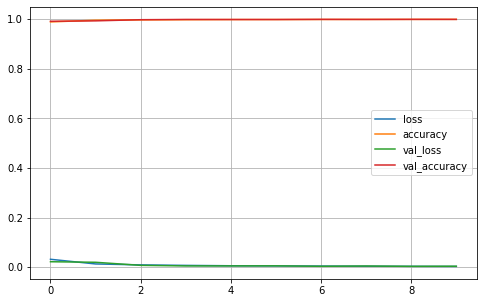

In [111]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [113]:
pred_y = model.predict(X_test)

In [114]:
pred_y

array([[1.0000000e+00, 1.0834551e-10],
       [9.9998844e-01, 1.1592873e-05],
       [1.0000000e+00, 6.7763096e-16],
       ...,
       [1.0000000e+00, 5.6161083e-12],
       [1.0000000e+00, 2.1195534e-15],
       [1.0000000e+00, 1.2965905e-09]], dtype=float32)

In [115]:
Y_test.value_counts()

0    56649
1       94
Name: Class, dtype: int64

In [116]:
rounded_prediction= np.argmax(pred_y,axis=1)

In [117]:
rounded_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
cm= confusion_matrix(Y_test,Y_test)
cm

array([[56649,     0],
       [    0,    94]])

In [119]:
cm= confusion_matrix(rounded_prediction,Y_test)
cm

array([[56540,    19],
       [  109,    75]])

In [120]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[56540    19]
 [  109    75]]


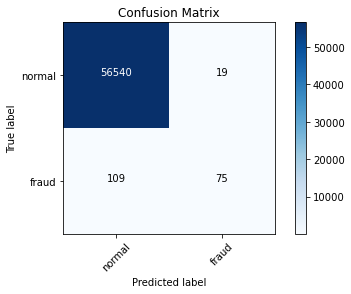

In [121]:
cm_plot_labels = ['normal','fraud']


plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [122]:
print(classification_report(rounded_prediction,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56559
           1       0.80      0.41      0.54       184

    accuracy                           1.00     56743
   macro avg       0.90      0.70      0.77     56743
weighted avg       1.00      1.00      1.00     56743



In [123]:
model.save("credit.h5")